In [37]:
import pandas as pd

In [44]:
df = pd.read_csv('monthly-milk-production.csv',';', index_col=False, parse_dates=['month'], dayfirst=True)

In [45]:
import matplotlib.pyplot as plt

In [46]:
df.head()

,month,milk
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [78]:
df.iloc[2,1]

640

/Users/andreyleonov/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


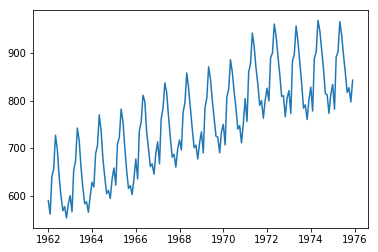

In [50]:
plt.plot(df.month, df.milk)

In [52]:
import statsmodels.api as sm
round(sm.tsa.stattools.adfuller(df.milk)[1], 2)

0.63

In [72]:
len(df)

168

In [69]:
p = pd.Period(str(df.month[3]))
p.days_in_month

30

In [84]:
ls = []
k = 0
for i in range(len(df)):
    p = pd.Period(str(df.month[i]))
    ls.append(float(df.iloc[i,1])/p.days_in_month) 

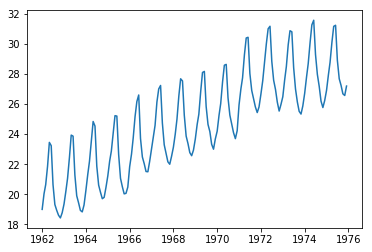

In [85]:
plt.plot(df.month, np.array(ls))

In [83]:
import numpy as np
sum(np.array(ls))

4166.326661899464

In [88]:
from statsmodels.tsa.stattools import adfuller
adfuller(np.array(ls))[1]

0.682215151308146

In [ ]:
milk.daily_diff1 = milk.daily - milk.daily.shift(1)

In [91]:
df = df.drop(['milk'], axis=1)

In [92]:
df['milk'] = np.array(ls)

In [110]:
df.head()

,month,milk
0,1962-01-01,19.000000
1,1962-02-01,20.035714
2,1962-03-01,20.645161
3,1962-04-01,21.866667
4,1962-05-01,23.451613


In [126]:
lf = [0,1,2,3,4,5,6,7,8,9,10,11]
adfuller(df.drop(index = lf).milk - df.shift(12).drop(index = lf).milk)

(-2.1594860932888063,
 0.22127672658830438,
 12,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.577665408088415,
  '5%': -2.8819726324025625},
 -25.225679141303317)

In [151]:
df.shape

(168, 2)

In [159]:
df1_ls = df.drop(index = lf).milk - df.shift(12).drop(index = lf).milk
#df2  = df1.drop(index = 0).milk - df.shift(12).drop(index = 0).milk

In [160]:
df1 = df.drop(index = lf)
df1.shape

(156, 2)

In [163]:
df1.head()
df1 = df1.drop(['milk'], axis = 1)

In [165]:
df1['milk'] = np.array(df1_ls)

In [172]:
adfuller(df1.drop(index  = 12).milk  - df1.shift(1).drop(index = 12).milk)

(-5.4813263347969325,
 2.2808455518036712e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.577665408088415,
  '5%': -2.8819726324025625},
 -20.905137509892256)

In [173]:
df3 = df1.drop(index  = 12).milk  - df1.shift(1).drop(index = 12).milk

In [177]:
df2 = df1.drop(index  = 12)
df2.head()
df2 = df2.drop(['milk'], axis = 1)

In [178]:
df2['milk'] = np.array(df3)

In [179]:
df2

,month,milk
13,1963-02-01,-0.176267
14,1963-03-01,0.240783
15,1963-04-01,0.147312
16,1963-05-01,-0.082796
17,1963-06-01,0.149462
18,1963-07-01,0.011828
19,1963-08-01,-0.064516
20,1963-09-01,-0.080645
21,1963-10-01,-0.177419
22,1963-11-01,0.077419


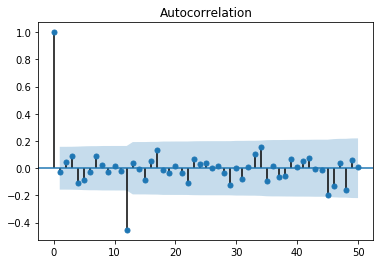

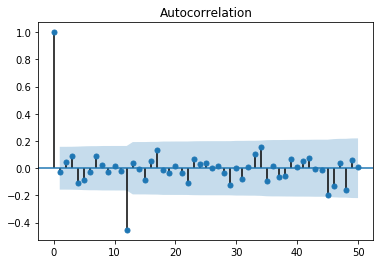

In [181]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df3.values.squeeze(), lags=50)

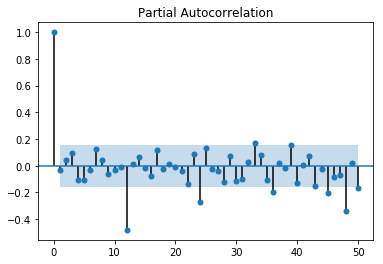

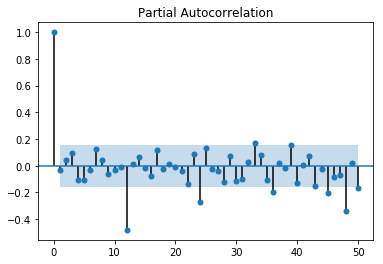

In [183]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(df3.values.squeeze(), lags=50)